In [1]:
import sys
sys.path.insert(0,'/home/charles/@@@@@_jupyter/script')
from MyEnv import Get_MyEnv
Get_MyEnv().env_cassandra
from envCassandraDAO import envCassandraDAO

MyEnv init....


In [81]:
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import MultinomialNB, GaussianNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC, LinearSVC
from sklearn.metrics import accuracy_score , roc_auc_score , roc_curve
from sklearn.metrics import precision_recall_fscore_support
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV, cross_val_score
from scipy.stats import randint as sp_randint, uniform, expon

from keras.utils import np_utils, generic_utils, get_file
import scikitplot as skplt

%pylab inline
import matplotlib.pyplot as plt

In [3]:
import xgboost as xgb
from xgboost.sklearn import XGBClassifier

In [4]:
from datetime import datetime
import pickle
import numpy as np
import json
import requests
import pandas as pd
pd.set_option('max_colwidth', 100)

In [5]:
from keras.preprocessing import sequence
from keras.preprocessing.text import Tokenizer
from keras.models import Sequential, load_model
from keras.layers.core import Dense, Dropout, Activation,Flatten
from keras.layers import Conv1D, GlobalMaxPooling1D,MaxPooling1D
from keras.layers.embeddings import Embedding
from keras.layers.wrappers import Bidirectional
from keras.callbacks import EarlyStopping, ReduceLROnPlateau, ModelCheckpoint, TensorBoard
from keras.optimizers import adam, RMSprop
from keras.layers.recurrent import LSTM, GRU, SimpleRNN
from keras.layers import Dense, Dropout, Embedding, Input, merge, Reshape, Concatenate
from keras.layers import Conv2D, MaxPool2D, Embedding
from keras.utils import np_utils, generic_utils, get_file
from keras import optimizers, metrics
from keras.models import Model

In [6]:
import warnings

In [7]:
from NLP_IntentPreprocessing import IntentPreprocessing

In [8]:
from NLP_JiebaSegmentor import JiebaSegmentor, Get_JiebaSegmentor
jieba_data_set = 'dataset_02'
jieba_dict_path1 = "/home/charles/dataset/jieba/" + jieba_data_set +  "/dict_taiwan.txt"
jieba_dict_path2 = "/home/charles/dataset/jieba/" + jieba_data_set +  "/userdict.txt"
jieba_dict_path3 = "/home/charles/dataset/jieba/" + jieba_data_set +  "/dict.txt.big"
jieba_dict_path4 = "/home/charles/dataset/jieba/" + jieba_data_set +  "/dict.txt.small"
jieba_stopwords_path = "/home/charles/dataset/jieba/" + jieba_data_set +  "/stopwords.txt"

js = JiebaSegmentor(dict_path=jieba_dict_path1,
                    userdict=[],
                    stopwords=False,
                    stopwords_path=jieba_stopwords_path)

DEBUG:jieba:Building prefix dict from /home/charles/dataset/jieba/dataset_02/dict_taiwan.txt ...
DEBUG:jieba:Loading model from cache /tmp/jieba.uc7e0f43f50d825489eed13ef9e4d17b7.cache
DEBUG:jieba:Loading model cost 0.294 seconds.
DEBUG:jieba:Prefix dict has been built succesfully.


In [9]:
test_cut_raw_0 = js.pseg_lcut('打分機給sandy')
test_cut_raw_0

,tag,word
0,v,打
1,n,分機
2,p,給
3,eng,sandy


In [10]:
train_sentence_df = pd.read_csv('data/intent_data/OA_robot_intent_train_data_simple_6.csv')
train_sentence_df

,sentence,target
0,打給,qcall
1,撥打,qcall
2,打電話,qcall
3,查電話,qcall
4,查分機,qcall
5,打分機,qcall
6,撥打分機,qcall
7,撥打電話,qcall
8,打給,qcall
9,播打分機,qcall


In [14]:
print('total : {}'.format(len(train_sentence_df)))
print('weather : {}'.format(len(train_sentence_df[train_sentence_df.target == 'weather'])))
print('phone : {}'.format(len(train_sentence_df[train_sentence_df.target == 'qcall'])))
print('leave : {}'.format(len(train_sentence_df[train_sentence_df.target == 'apply_leave'])))

In [15]:
df_all_test = pd.read_csv('data/intent_data/OA_robot_intent_test_data.csv')
df_all_test

,sentence,target
0,打給XXX,qcall
1,撥打XXX,qcall
2,我要打電話給李振忠,qcall
3,幫我Call一下李振忠的桌機,qcall
4,打分機19910,qcall
5,請幫我聯絡一下某某人,qcall
6,幫我打給某某人一下,qcall
7,可以幫我打給某某人一下,qcall
8,Hi 助理 請幫我打點話給某同仁,qcall
9,Hi 助理 我要打電話給某同仁,qcall


# 前處理

In [16]:
# 標點符號過濾
WORD_FILTERS = '!"#$&()*+,-./:;<=>?@[\\]^_{|}~\t\n'
# 字典數量 1+最大單字數
NUM_WORDS = 500

train_ratio = 0.9

"""
資料前處理
"""
# 資料打散
train_sentence_df = IntentPreprocessing.shuffle(train_sentence_df)

# 去除空白
train_sentence_df = IntentPreprocessing.trim_df(df=train_sentence_df,
                                                column_name='sentence',
                                                new_column_name='sentence')
# 用特定字元切開
train_sentence_df = IntentPreprocessing.cut_to_word_df(df=train_sentence_df,
                                                       column_name='sentence',
                                                       new_column_name='cut_words',
                                                       js=js,
                                                       split_word=",")

cut_words = train_sentence_df.cut_words
train_sentence_df

,sentence,target,cut_words
0,天氣狀況,weather,"天氣,狀況"
1,撥個電話,qcall,"撥個,電話"
2,申請休假,apply_leave,"申請,休假"
3,打分機,qcall,"打,分機"
4,天氣如何,weather,"天氣,如何"
5,打MVPN,qcall,"打,MVPN"
6,打電話,qcall,打電話
7,下雨,weather,下雨
8,qcall,qcall,qcall
9,不進公司,apply_leave,"不進,公司"


In [17]:
# 標點符號過濾
WORD_FILTERS = '!"#$&()*+,-./:;<=>?@[\\]^_{|}~\t\n'
# 字典數量 1+最大單字數
NUM_WORDS = 500

train_ratio = 0.9

"""
資料前處理
"""
# 資料打散
test_sentence_df = IntentPreprocessing.shuffle(df_all_test)

# 去除空白
test_sentence_df = IntentPreprocessing.trim_df(df=test_sentence_df,
                                                column_name='sentence',
                                                new_column_name='sentence')
# 用特定字元切開
test_sentence_df = IntentPreprocessing.cut_to_word_df(df=test_sentence_df,
                                                       column_name='sentence',
                                                       new_column_name='cut_words',
                                                       js=js,
                                                       split_word=",")

cut_words = test_sentence_df.cut_words
test_sentence_df

,sentence,target,cut_words
0,Hi助理可以幫我請假嗎,apply_leave,"Hi,助理,可以,幫,我,請假,嗎"
1,明天台北降雨機率多少呢,weather,"明天,台北,降雨,機率,多少,呢"
2,墾丁週末旅遊天氣,weather,"墾丁,週末,旅遊,天氣"
3,送假單,apply_leave,"送,假單"
4,太陽大嗎,weather,"太陽,大,嗎"
5,幫我找一下李振忠,qcall,"幫,我,找,一下,李振,忠"
6,我後天有事幫我請個事假,apply_leave,"我,後天,有事,幫,我,請,個,事假"
7,幫我撥電話,qcall,"幫,我,撥,電話"
8,打電話到Celine的桌機,qcall,"打電話,到,Celine,的,桌機"
9,不想上班,apply_leave,"不想,上班"


In [18]:
# mapping & mapping_name 取出來
mapping_dict = {}
for index, row in train_sentence_df.iterrows():
    if mapping_dict.has_key(row['target']):
        continue
#     mapping_dict.update({row['skill_id']: 'skill_name'})
    mapping_dict.update({row['target']: 'skill_name'})

mapping = mapping_dict.keys()
mapping_name = mapping_dict.values()

print(mapping)
print(mapping_name)

In [19]:
def get_loc(target):
    return mapping.index(target)    

train_sentence_df['target_index'] = train_sentence_df['target'].apply(lambda s: get_loc(s))
train_sentence_df['skill_id'] = train_sentence_df['target']
train_sentence_df['cut_words_space'] = train_sentence_df['cut_words'].str.replace(","," ")
test_sentence_df['target_index'] = test_sentence_df['target'].apply(lambda s: get_loc(s))
test_sentence_df['skill_id'] = test_sentence_df['target']
test_sentence_df['cut_words_space'] = test_sentence_df['cut_words'].str.replace(","," ")

train_sentence_df

,sentence,target,cut_words,target_index,skill_id,cut_words_space
0,天氣狀況,weather,"天氣,狀況",0,weather,天氣 狀況
1,撥個電話,qcall,"撥個,電話",1,qcall,撥個 電話
2,申請休假,apply_leave,"申請,休假",2,apply_leave,申請 休假
3,打分機,qcall,"打,分機",1,qcall,打 分機
4,天氣如何,weather,"天氣,如何",0,weather,天氣 如何
5,打MVPN,qcall,"打,MVPN",1,qcall,打 MVPN
6,打電話,qcall,打電話,1,qcall,打電話
7,下雨,weather,下雨,0,weather,下雨
8,qcall,qcall,qcall,1,qcall,qcall
9,不進公司,apply_leave,"不進,公司",2,apply_leave,不進 公司


In [20]:
test_sentence_df

,sentence,target,cut_words,target_index,skill_id,cut_words_space
0,Hi助理可以幫我請假嗎,apply_leave,"Hi,助理,可以,幫,我,請假,嗎",2,apply_leave,Hi 助理 可以 幫 我 請假 嗎
1,明天台北降雨機率多少呢,weather,"明天,台北,降雨,機率,多少,呢",0,weather,明天 台北 降雨 機率 多少 呢
2,墾丁週末旅遊天氣,weather,"墾丁,週末,旅遊,天氣",0,weather,墾丁 週末 旅遊 天氣
3,送假單,apply_leave,"送,假單",2,apply_leave,送 假單
4,太陽大嗎,weather,"太陽,大,嗎",0,weather,太陽 大 嗎
5,幫我找一下李振忠,qcall,"幫,我,找,一下,李振,忠",1,qcall,幫 我 找 一下 李振 忠
6,我後天有事幫我請個事假,apply_leave,"我,後天,有事,幫,我,請,個,事假",2,apply_leave,我 後天 有事 幫 我 請 個 事假
7,幫我撥電話,qcall,"幫,我,撥,電話",1,qcall,幫 我 撥 電話
8,打電話到Celine的桌機,qcall,"打電話,到,Celine,的,桌機",1,qcall,打電話 到 Celine 的 桌機
9,不想上班,apply_leave,"不想,上班",2,apply_leave,不想 上班


In [22]:
y_train = train_sentence_df.target_index 
y_train_one_hot = np_utils.to_categorical(y_train)
# print (y_train_one_hot[0])
# 總共類別數
num_classes = len((y_train_one_hot[0]))
print ('num_classes = {}'.format(num_classes))

y_test = test_sentence_df.target_index 
# y_test_one_hot = np_utils.to_categorical(y_test)
# y_test_one_hot[0]

(len(train_sentence_df), len(test_sentence_df)) , (len(list(y_train)), len(list(y_test)))

((105, 289), (105, 289))

In [25]:
ppp

NameError: name 'ppp' is not defined

# keras TagOfWord

In [ ]:
# skill_id 轉爲 index , keras traing model 的label欄位必須是數字
train_sentence_df = IntentPreprocessing.get_mapping_index_df(df=train_sentence_df,
                                                             column_name='skill_id',
                                                             new_column_name='skill_id_index',
                                                             mapping=mapping)

print(train_sentence_df)

# 取得label欄位
y_train = train_sentence_df.skill_id_index

# # 轉成one_hot_encoding
# y_all_one_hot = IntentPreprocessing.to_one_hot(y_all)
# print (y_all_one_hot[0])
# # 總共類別數
# num_classes = len((y_all_one_hot[0]))
# print ('num_classes = {}'.format(num_classes))

# 總共類別數
num_classes = len(mapping)
print('num_classes = {}'.format(num_classes))

In [ ]:
# 使用Keras Tokenizer進行斷詞
tokenizer_intent = Tokenizer(filters=WORD_FILTERS,
                             num_words=NUM_WORDS,
                             split=",")

# 斷詞後全部合併丟到fit_on_texts,組出字典
tokenizer_intent.fit_on_texts(cut_words)

# # 將字典存到fs
# tokenizer_id = robot_id + "+" + model_id
# with open(Get_MyEnv().env_fs_model_path + "intent/" + tokenizer_id + ".pickle", 'wb') as handle:
#     pickle.dump(tokenizer_intent, handle, protocol=pickle.HIGHEST_PROTOCOL)

# 轉成向量
seq = IntentPreprocessing.texts_to_sequences(tokenizer_intent, cut_words)

# 同義長度
sentence_max_len = 10
print('sentence_max_len : {}'.format(sentence_max_len))
x_train = IntentPreprocessing.pad_sequences(seq, sentence_max_len)

In [ ]:
# x_train

In [ ]:
# 將所有sentence轉換成陣列,每一句話斷詞後用空白隔開
# cut_words_space_tfidf = list(train_sentence_df['cut_words_space'])
# cut_words_space_tfidf

In [ ]:
# def train_model(classifier, feature_vector_train, train_label, feature_vector_valid, valid_label,
#                 is_neural_net=False):
    
#     # fit the training dataset on the classifier 
#     classifier.fit(feature_vector_train, train_label) 
#     # predict the labels on validation dataset 
#     predictions = classifier.predict(feature_vector_valid) 

#     if is_neural_net: 
#         predictions = predictions.argmax(axis=-1) 

#     return accuracy_score(predictions, valid_label)
#     return predictions, valid_label

# WordCount

In [125]:
"""
Bag of Words是文檔數據的表示模型
它簡單地計算單詞在文檔中出現的次數
Bag-of-Words通常通過權衡特殊單詞和相關術語來用於聚類，分類和主題建模
"""
vectorizer = CountVectorizer()
x_train_count = vectorizer.fit_transform(train_sentence_df['cut_words_space'])
x_test_count = vectorizer.transform(test_sentence_df['cut_words_space'])
x_train_count, x_test_count

(<105x87 sparse matrix of type '<type 'numpy.int64'>'
 	with 146 stored elements in Compressed Sparse Row format>,
 <289x87 sparse matrix of type '<type 'numpy.int64'>'
 	with 324 stored elements in Compressed Sparse Row format>)

# TFIDF

In [24]:
"""
TF-IDF（詞頻/逆文檔頻率）是最流行的IR（信息檢索）技術之一
用於分析單詞在文檔中的重要性。研究表明，83％的基於文本的推薦系統使用TF-IDF
TF-IDF衡量文檔中文字的重要性
例如，「the」在任何文檔中都是常用的，因此TF-IDF並不認為「the」對文檔的特性很重要
相反，IT相關主題使用「python」，TF-IDF認為「python」是識別主題和類別的重要特徵詞
"""

# define transformer (轉換器)
vectorizer = TfidfVectorizer(norm=None) ## do not do normalize
x_train_tfidf = vectorizer.fit_transform(train_sentence_df['cut_words_space'])
x_test_tfidf = vectorizer.transform(test_sentence_df['cut_words_space'])
x_train_tfidf, x_test_tfidf

(<105x87 sparse matrix of type '<type 'numpy.float64'>'
 	with 146 stored elements in Compressed Sparse Row format>,
 <289x87 sparse matrix of type '<type 'numpy.float64'>'
 	with 324 stored elements in Compressed Sparse Row format>)

# Word2vec

In [25]:
"""
Word2vec擅長對相似的單詞進行分組，並根據上下文對單詞的含義進行高度準確的猜測
它內部有兩種不同的算法：CBoW（Continuous Bag-of-Words）和skip gram模型
Skip Gram用於預測目標詞的上下文
CBoW是從上下文預測目標詞
"""


'\nWord2vec\xe6\x93\x85\xe9\x95\xb7\xe5\xb0\x8d\xe7\x9b\xb8\xe4\xbc\xbc\xe7\x9a\x84\xe5\x96\xae\xe8\xa9\x9e\xe9\x80\xb2\xe8\xa1\x8c\xe5\x88\x86\xe7\xb5\x84\xef\xbc\x8c\xe4\xb8\xa6\xe6\xa0\xb9\xe6\x93\x9a\xe4\xb8\x8a\xe4\xb8\x8b\xe6\x96\x87\xe5\xb0\x8d\xe5\x96\xae\xe8\xa9\x9e\xe7\x9a\x84\xe5\x90\xab\xe7\xbe\xa9\xe9\x80\xb2\xe8\xa1\x8c\xe9\xab\x98\xe5\xba\xa6\xe6\xba\x96\xe7\xa2\xba\xe7\x9a\x84\xe7\x8c\x9c\xe6\xb8\xac\n\xe5\xae\x83\xe5\x85\xa7\xe9\x83\xa8\xe6\x9c\x89\xe5\x85\xa9\xe7\xa8\xae\xe4\xb8\x8d\xe5\x90\x8c\xe7\x9a\x84\xe7\xae\x97\xe6\xb3\x95\xef\xbc\x9aCBoW\xef\xbc\x88Continuous Bag-of-Words\xef\xbc\x89\xe5\x92\x8cskip gram\xe6\xa8\xa1\xe5\x9e\x8b\nSkip Gram\xe7\x94\xa8\xe6\x96\xbc\xe9\xa0\x90\xe6\xb8\xac\xe7\x9b\xae\xe6\xa8\x99\xe8\xa9\x9e\xe7\x9a\x84\xe4\xb8\x8a\xe4\xb8\x8b\xe6\x96\x87\nCBoW\xe6\x98\xaf\xe5\xbe\x9e\xe4\xb8\x8a\xe4\xb8\x8b\xe6\x96\x87\xe9\xa0\x90\xe6\xb8\xac\xe7\x9b\xae\xe6\xa8\x99\xe8\xa9\x9e\n'

# ALGORITHM

In [103]:
def predict_result(_y_predict_probability):
    # 將預測機率找出最大值 and 把index找出來
    predict_class = np.argmax(_y_predict_probability, axis=1)

    # 轉回原本分類名稱
    y_predict_id = IntentPreprocessing.to_cat_name(predict_class, mapping)
    y_predict_name = IntentPreprocessing.to_cat_name(predict_class, mapping)
    # y_predict_name = IntentPreprocessing.to_cat_name(predict_class, mapping_name)
    y_predict = predict_class

    # 將預測結果轉成小數點後4位
    predict_arr = []
    for row in y_predict_probability:
        row_arr = []
        for item in row:
            row_arr.append(IntentPreprocessing.float_display(item, 4))
        predict_arr.append(row_arr)

    predict_df = pd.DataFrame({'sentence': test_sentence_df.sentence,
                               'answer': y_test,
                               'answer_id': test_sentence_df.skill_id,
                               'y_predict': y_predict,
                               'y_predict_id': y_predict_id,
                               'y_predict_name': y_predict_name,
                               'y_predict_probability': predict_arr})

    print("----- 統計值 -----")
    print(predict_df)

    answer = predict_df['answer']
    predict = predict_df['y_predict']

    # 預測錯誤
    print("----- 分類錯誤的類別 -----")
    error_df = predict_df[predict_df['y_predict'] != predict_df['answer']]
    print(error_df)

    total_count = len(test_sentence_df)
    error_count = len(error_df)
    correct_count = total_count - error_count
    acc_score = accuracy_score(answer, predict)
#     accuracy_score = float(correct_count) / total_count
    # accuracy_score = float(
    #     sum(np.array(train_sentence_df.skill_id) == np.argmax(y_predict_probability, axis=1))) / len(
    #     train_sentence_df)
    print('total_count: {}'.format(total_count))
    print('correct_count: {}'.format(correct_count))

    # confusion matrix
    print("----- confusion matrix -----")
    print(pd.crosstab(np.array(y_predict_name), np.array(test_sentence_df.skill_id),
                      rownames=['predict'], colnames=['answer']))

    """
    accuracy.precision.recall.f1_score
    """
    precision_score, recall_score, f1_score, support = precision_recall_fscore_support(answer, predict,
                                                                                       average='macro')

    acc_score = float('%.4f' % acc_score)
    precision_score = float('%.4f' % precision_score)
    recall_score = float('%.4f' % recall_score)
    f1_score = float('%.4f' % f1_score)

#     print('accuracy: {0:0.4f}'.format(acc_score))
#     print('precision: {0:0.4f}'.format(precision_score))
#     print('recall: {0:0.4f}'.format(recall_score))
#     print('f1_score: {0:0.4f}'.format(f1_score))
    
    return acc_score, precision_score, recall_score, f1_score


# 比較多個model看優劣

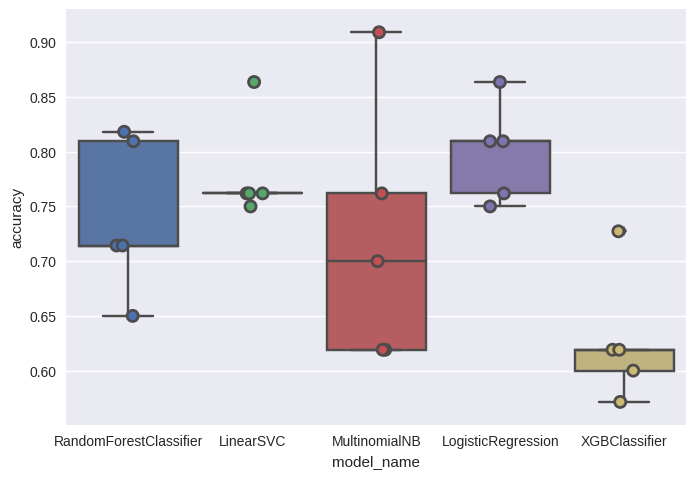

In [38]:
models = [
    RandomForestClassifier(n_estimators=200, max_depth=3, random_state=0),
    LinearSVC(),
    MultinomialNB(),
    LogisticRegression(random_state=0),
    xgb.XGBClassifier(objective ="multi:softprob",num_class =num_classes)
]
CV = 5
cv_df = pd.DataFrame(index=range(CV * len(models)))
entries = []
for model in models:
    model_name = model.__class__.__name__
    accuracies = cross_val_score(model, x_train_tfidf, y_train, scoring='accuracy', cv=CV)
    for fold_idx, accuracy in enumerate(accuracies):
        entries.append((model_name, fold_idx, accuracy))
cv_df = pd.DataFrame(entries, columns=['model_name', 'fold_idx', 'accuracy'])

import seaborn as sns
sns.boxplot(x='model_name', y='accuracy', data=cv_df)
sns.stripplot(x='model_name', y='accuracy', data=cv_df, 
              size=8, jitter=True, edgecolor="gray", linewidth=2)
plt.show()

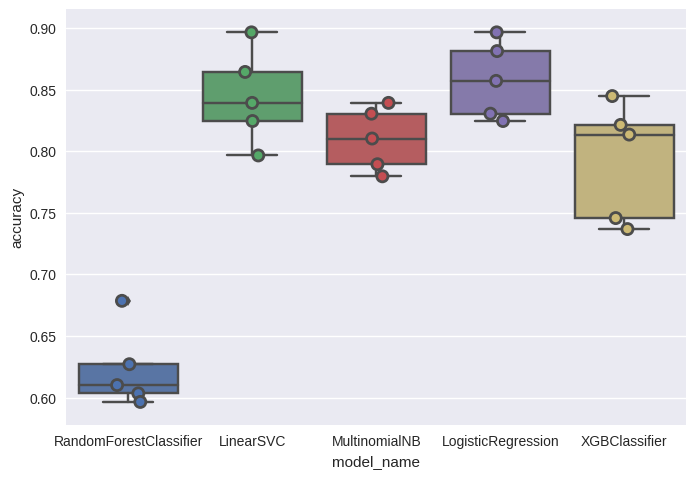

In [57]:
models = [
    RandomForestClassifier(n_estimators=200, max_depth=3, random_state=0),
    LinearSVC(),
    MultinomialNB(),
    LogisticRegression(random_state=0),
    xgb.XGBClassifier(objective ="multi:softprob",num_class =num_classes)
]
CV = 5
cv_df = pd.DataFrame(index=range(CV * len(models)))
entries = []
for model in models:
    model_name = model.__class__.__name__
    accuracies = cross_val_score(model, x_test_tfidf, y_test, scoring='accuracy', cv=CV)
    for fold_idx, accuracy in enumerate(accuracies):
        entries.append((model_name, fold_idx, accuracy))
cv_df = pd.DataFrame(entries, columns=['model_name', 'fold_idx', 'accuracy'])

import seaborn as sns
sns.boxplot(x='model_name', y='accuracy', data=cv_df)
sns.stripplot(x='model_name', y='accuracy', data=cv_df, 
              size=8, jitter=True, edgecolor="gray", linewidth=2)
plt.show()

個別測試

In [126]:
model_name = "xgboost"
xgb_model = xgb.XGBClassifier(objective ="multi:softprob",num_class =num_classes)
parameters= {'n_estimators':[100, 50, 200], 'learning_rate':[0.1,0.05,0.01], 'max_depth':[8,10,12]}

xgb_best_model = GridSearchCV(xgb_model, 
                                parameters,
                                cv=5, 
                                scoring='accuracy', 
                                return_train_score='cv_results_', 
                                verbose=2, 
                                n_jobs = -1)



xgb_best_model.fit(x_train_tfidf, y_train)
xgb_best_model
y_predict_probability = xgb_best_model.predict_proba(x_test_tfidf).reshape(y_test.shape[0], num_classes)
acc_score, precision_score, recall_score, f1_score = predict_result(y_predict_probability)
print("{} >>> acc_score : {} ; precision_score : {} ; recall_score : {} ; f1_score : {}".format(
    model_name,
    acc_score,
                                                                                   precision_score, 
                                                                                   recall_score, 
                                                                                   f1_score))
acc_score, precision_score, recall_score, f1_score

(0.5882, 0.7808, 0.6375, 0.5854)

In [ ]:
ylabelXGB = np.argmax(y_predict_probability, axis=1)  # return the index of the biggest pro
print ('predicting, Xgboost Top1 classification Accuracy=%f' % (sum( int(ylabelXGB[i]) == y_train[i] for i in range(len(y_train))) / float(len(y_train)) ))

In [129]:
model_name = "SVM SVC"
svc_model = SVC(probability=True)

parameters = {'kernel': ['linear'], 'C': [0.1, 1, 10]}
svc_best_model = GridSearchCV(svc_model, 
                              parameters, 
                              cv=5, 
                              scoring='accuracy', 
                              return_train_score='cv_results_', 
                              n_jobs=-1)
svc_best_model.fit(x_train_tfidf, y_train)
svc_best_model
y_predict_probability = svc_best_model.predict_proba(x_test_tfidf).reshape(y_test.shape[0], num_classes)
acc_score, precision_score, recall_score, f1_score = predict_result(y_predict_probability)
print("{} >>> acc_score : {} ; precision_score : {} ; recall_score : {} ; f1_score : {}".format(
    model_name,
    acc_score,
    precision_score, 
    recall_score, 
    f1_score))
acc_score, precision_score, recall_score, f1_score

(0.8374, 0.8563, 0.8397, 0.8132)

In [106]:
model_name = "(Multinomial) Naive Bayes"
bayes_mnb_best_model = MultinomialNB()
# parameters = {'vect__ngram_range': [(1, 1), (1, 2),(1,3)],
#               'vect__max_df': ( 0.7,0.8,0.9,1.0),
#               'vect__min_df': (1,2)
# }
# bayes_mnb_best_model = GridSearchCV(bayes_mnb_model, 
#                               parameters, 
#                               cv=5, 
#                               scoring='accuracy', 
#                               return_train_score='cv_results_', 
#                               n_jobs=-1)
bayes_mnb_best_model.fit(x_train_tfidf, y_train)
bayes_mnb_best_model
y_predict_probability = bayes_mnb_best_model.predict_proba(x_test_tfidf).reshape(y_test.shape[0], num_classes)
acc_score, precision_score, recall_score, f1_score = predict_result(y_predict_probability)
print("{} >>> acc_score : {} ; precision_score : {} ; recall_score : {} ; f1_score : {}".format(
    model_name,
    acc_score,
                                                                                   precision_score, 
                                                                                   recall_score, 
                                                                                   f1_score))
acc_score, precision_score, recall_score, f1_score

(0.8478, 0.8609, 0.8467, 0.8217)

In [124]:
model_name = "RandomForestClassifier"
# rf_model = RandomForestClassifier(criterion='gini', 
#                                  n_estimators=1000,
#                                  min_samples_split=12,
#                                  min_samples_leaf=1,
#                                  oob_score=True,
#                                  random_state=1,
#                                  n_jobs=-1) 

rf_model = RandomForestClassifier(n_estimators=20)
parameters = {"max_depth": [3, None],
              "max_features": sp_randint(1, 11),
              "min_samples_split": sp_randint(2, 11),
              "min_samples_leaf": sp_randint(1, 11),
              "bootstrap": [True, False],
              "criterion": ["gini"]}
rf_best_model = RandomizedSearchCV(rf_model, 
                                   param_distributions=parameters,
                                   n_iter=20)

rf_best_model.fit(x_train_tfidf, y_train)
rf_best_model
y_predict_probability = rf_best_model.predict_proba(x_test_tfidf).reshape(y_test.shape[0], num_classes)
acc_score, precision_score, recall_score, f1_score = predict_result(y_predict_probability)
print("{} >>> acc_score : {} ; precision_score : {} ; recall_score : {} ; f1_score : {}".format(
    model_name,
    acc_score,
                                                                                   precision_score, 
                                                                                   recall_score, 
                                                                                   f1_score))
acc_score, precision_score, recall_score, f1_score

(0.8408, 0.858, 0.842, 0.8159)

In [120]:
model_name = "LogisticRegression"
lr_model = LogisticRegression()
parameters = {'penalty': ['l2'], 
              'C': [10]}
lr_best_model = GridSearchCV(lr_model, parameters, cv=5)
lr_best_model.fit(x_train_tfidf, y_train)
lr_best_model

y_predict_probability = lr_best_model.predict_proba(x_test_tfidf).reshape(y_test.shape[0], num_classes)
acc_score, precision_score, recall_score, f1_score = predict_result(y_predict_probability)
print("{} >>> acc_score : {} ; precision_score : {} ; recall_score : {} ; f1_score : {}".format(
    model_name,
    acc_score,
                                                                                   precision_score, 
                                                                                   recall_score, 
                                                                                   f1_score))
acc_score, precision_score, recall_score, f1_score

(0.8478, 0.8609, 0.8467, 0.8217)

調參後測試

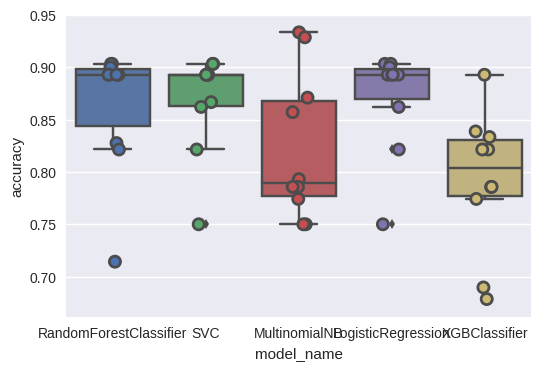

In [92]:
rf_best_model = RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=20, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)
svc_best_model = SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
                  decision_function_shape='ovr', degree=3, gamma='auto', kernel='rbf',
                  max_iter=-1, probability=True, random_state=None, shrinking=True,
                  tol=0.001, verbose=False)
bayes_mnb_model = MultinomialNB()
lr_best_model = LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)
xgb_best_model = XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bytree=1, gamma=0, learning_rate=0.1, max_delta_step=0,
       max_depth=3, min_child_weight=1, missing=None, n_estimators=100,
       n_jobs=1, nthread=None, num_class=3, objective='multi:softprob',
       random_state=0, reg_alpha=0, reg_lambda=1, scale_pos_weight=1,
       seed=None, silent=True, subsample=1)
models = [rf_best_model, 
          svc_best_model,
          bayes_mnb_model,
          lr_best_model,
          xgb_best_model]
CV = 10
cv_df = pd.DataFrame(index=range(CV * len(models)))
entries = []
for model in models:
    model_name = model.__class__.__name__
    accuracies = cross_val_score(model, x_test_tfidf, y_test, scoring='accuracy', cv=CV)
    for fold_idx, accuracy in enumerate(accuracies):
        entries.append((model_name, fold_idx, accuracy))
cv_df = pd.DataFrame(entries, columns=['model_name', 'fold_idx', 'accuracy'])

import seaborn as sns
sns.boxplot(x='model_name', y='accuracy', data=cv_df)
sns.stripplot(x='model_name', y='accuracy', data=cv_df, 
              size=8, jitter=True, edgecolor="gray", linewidth=2)
plt.show()

In [30]:
model_list = [xgb_best_model, svc_best_model, bayes_mnb_model, rf_model, lr_best_model]
model_name_list = ["XGBoost", "SVC Lenear", "(Multinomial) Naive Bayes", "RandomForest", "LogisticRegression"]
index = 0
for model in model_list:
    model_name = model_name_list[index]
    y_predict_probability = model.predict_proba(x_test_tfidf).reshape(y_test.shape[0], num_classes)
    y_predict_probability
    acc_score, precision_score, recall_score, f1_score = predict_result(y_predict_probability)
#     print("{} >>> acc_score : {} ; precision_score : {} ; recall_score : {} ; f1_score : {}".format(
#         model_name,
#         acc_score,
#                                                                                        precision_score, 
#                                                                                        recall_score, 
#                                                                                        f1_score))
    print("========{}========".format(model_name))
    print("acc_score : {}".format(acc_score))
    print("f1_score : {}".format(f1_score))
    index = index + 1


NameError: name 'svc_best_model' is not defined

========XGBoost========
acc_score : 0.5882
f1_score : 0.5854
========SVC Lenear========
acc_score : 0.8374
f1_score : 0.8132
========(Multinomial) Naive Bayes========
acc_score : 0.8478
f1_score : 0.8217
========RandomForest========
acc_score : 0.8408
f1_score : 0.8159
========LogisticRegression========
acc_score : 0.8478
f1_score : 0.8217

# evaluate image

In [55]:
cm_plt = skplt.metrics.plot_confusion_matrix(np.array(test_sentence_df.target), np.array(y_predict_name))
cm_plt

NameError: name 'y_predict_name' is not defined

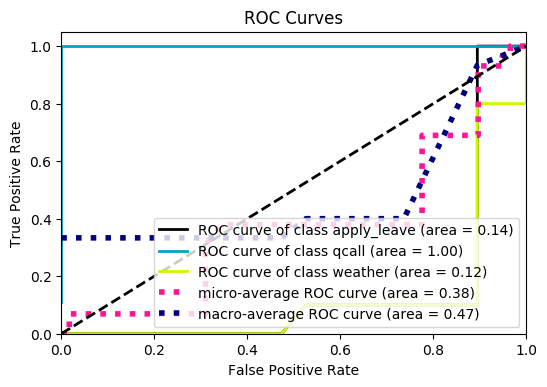

In [53]:
roc_plt = skplt.metrics.plot_roc(np.array(test_sentence_df.target), y_predict_probability)
# roc_plt.get_figure().savefig("/home/charles/roc_xgb_test.png")
roc_plt